In [15]:
import numpy as np
from mayavi import mlab
x, y = np.mgrid[0:3:1,0:3:1]
s = mlab.surf(x, y, np.asarray(x*0.1, 'd'))

@mlab.animate
def anim():
    for i in range(100):
        s.mlab_source.scalars = np.asarray(x*0.1*(i+5), 'd')
        yield

anim()
mlab.show()

In [14]:
# Produce some nice data.
n_mer, n_long = 6, 11
pi = np.pi
dphi = pi/1000.0
phi = np.arange(0.0, 2*pi + 0.5*dphi, dphi, 'd')
mu = phi*n_mer
x = np.cos(mu)*(1+np.cos(n_long*mu/n_mer)*0.5)
y = np.sin(mu)*(1+np.cos(n_long*mu/n_mer)*0.5)
z = np.sin(n_long*mu/n_mer)*0.5

# View it.
l = mlab.plot3d(x, y, z, np.sin(mu), tube_radius=0.025, colormap='Spectral')

# Now animate the data.
ms = l.mlab_source
for i in range(10):
    x = np.cos(mu)*(1+np.cos(n_long*mu/n_mer +
                                      np.pi*(i+1)/5.)*0.5)
    scalars = np.sin(mu + np.pi*(i+1)/5)
    ms.trait_set(x=x, scalars=scalars)
    
mlab.show()

In [11]:
x, y = np.mgrid[0:3:1,0:3:1]
s = mlab.surf(x, y, np.asarray(x*0.1, 'd'),
              representation='wireframe')
# Animate the data.
fig = mlab.gcf()
ms = s.mlab_source
for i in range(5):
    x, y = np.mgrid[0:3:1.0/(i+2),0:3:1.0/(i+2)]
    sc = np.asarray(x*x*0.05*(i+1), 'd')
    ms.reset(x=x, y=y, scalars=sc)
    fig.scene.reset_zoom()

In [16]:
import numpy as np
from mayavi import mlab

@mlab.animate(delay = 100)
def updateAnimation():
    t = 0.0
    while True:
        ball.mlab_source.set(x = np.cos(t), y = np.sin(t), z = 0)
        t += 0.1
        yield

ball = mlab.points3d(np.array(1.), np.array(0.), np.array(0.))

updateAnimation()
mlab.show()

### GEnerate animated series of pictures

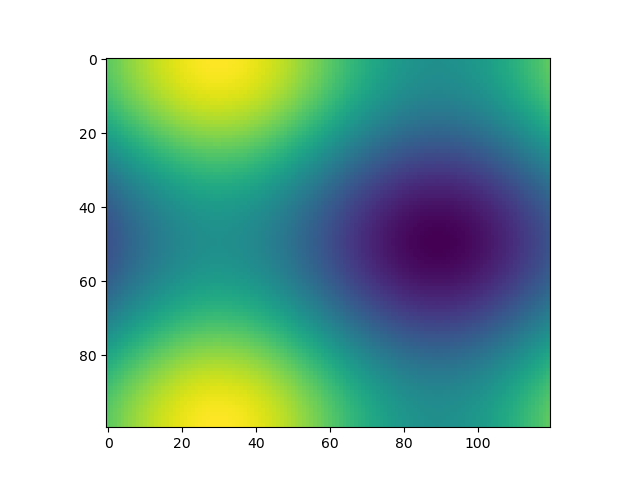

In [30]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

import matplotlib.animation as animation

fig, ax = plt.subplots()
# save = True
save = False
savePath = "/Users/nguyendat/Documents/GitHub/polar_vortice/polar_vortice/notebooks/Test/animated_1/"

def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []

for i in range(60):
    x += np.pi / 15
    y += np.pi / 30
    im = ax.imshow(f(x, y), animated=True)
    if i == 0:
        ax.imshow(f(x, y))  # show an initial one first
    ims.append([im])
    if save:
        fig.savefig(savePath+'ani_%04d.png'%i)
        
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,repeat_delay=1000)
# ani.to_jshtml()

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

In [37]:
# Author: Gael Varoquaux <gael.varoquaux@normalesup.org>
# Copyright (c) 2008, Enthought, Inc.
# License: BSD Style.

from mayavi import mlab
import numpy as np
from scipy.special import sph_harm

# Create a sphere
r = 0.3
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0:pi:101j, 0:2 * pi:101j]

x = r * sin(phi) * cos(theta)
y = r * sin(phi) * sin(theta)
z = r * cos(phi)

mlab.figure(1, bgcolor=(1, 1, 1), fgcolor=(0, 0, 0), size=(400, 300))
mlab.clf()
s = sph_harm(m, n, theta, phi).real

mlab.mesh(x, y, z, scalars=s, colormap='jet')

# mlab.view(90, 70, 6.2, (-1.3, -2.9, 0.25))
mlab.show()

In [39]:
s.shape

(101, 101)